In [ ]:
'''
Silhouette Clustering Algorithm:

Definition:
The Silhouette Coefficient is a measure of how similar an object is to its own cluster compared to other clusters. 
It ranges from -1 to 1, where a high value indicates that the object is well matched to its 
own cluster and poorly matched to neighboring clusters.

The Silhouette Coefficient for a single sample is defined as:

s(i) = (b(i) - a(i)) / max(a(i), b(i))

where:
- a(i) is the average distance between the sample and all other points in the same cluster.
- b(i) is the average distance between the sample and all points in the nearest cluster.

The overall Silhouette Coefficient is the average of the Silhouette Coefficients for all samples.

'''

In [ ]:
'''
Silhouette (Clustering):
First Step: 
Compute the Silhouette Coefficient for each sample.
For data point i:
1. Compute a(i): the average distance between i and all other points in the same cluster.
a(i) = (1 / |C(i)|) * Σ d(i, j) for all j ∈ C(i)

where C(i) is the set of points in the same cluster as i.
d(i, j) is the distance between points i and j.

2. Compute b(i): the average distance between i and all points in the nearest cluster.
b(i) = (1 / |C'(i)|) * Σ d(i, j) for all j ∈ C'(i)

where C'(i) is the set of points in the nearest cluster to i.

3. Compute s(i) = (b(i) - a(i)) / max(a(i), b(i)).


'''

In [2]:
# Implementation
import pandas as pd
df = pd.read_csv('healthcare.csv')

In [3]:
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


In [4]:
import matplotlib.pyplot as plt

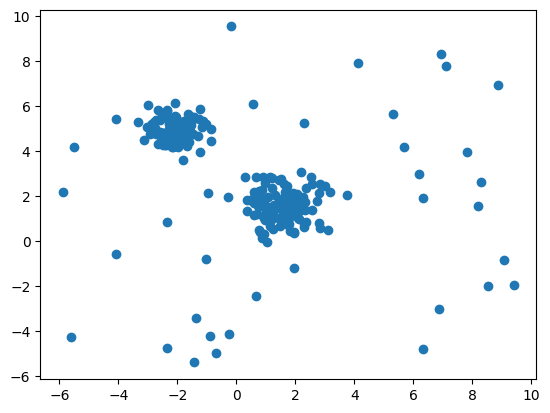

In [5]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])

In [6]:
from sklearn.ensemble import IsolationForest

In [22]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

In [23]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [24]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind


(array([  4,  20,  24,  45,  48,  49,  53,  55,  60,  61,  62,  63,  67,
         72,  74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119,
        126, 130, 132, 133, 141, 151, 160, 166, 167, 177, 179, 181, 182,
        187, 199, 204, 212, 217, 220, 221, 227, 242, 247, 248]),)

In [25]:
x = df.values

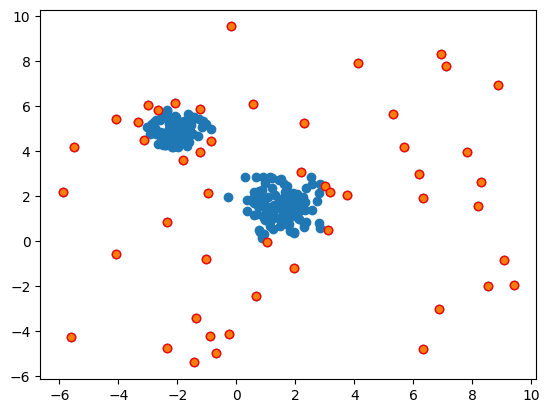

In [26]:
abn_ind = np.where(predictions<0)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.scatter(x[abn_ind, 0], x[abn_ind, 1], edgecolor='r')